---
layout: post
title:  "Sentiment Analysis"
date:   2023-06-09 10:14:54 +0700
categories: MachineLearning
---

# Introduction

Sentiment analysis, also known as opinion mining, is a heavily researched topic in Natural Language Processing (NLP). It helps to determine the emotion, attitude, and sentiment expressed in a text. After having understood the opinion of the people, the company can make adjustment to the product or make some informed business decision. This practice is being widely applied across disciplines since social media is having more and more impact in the society. The ability to extract insights from social data is crucial in business steps such as educating the market, customer feedback, and surveying at scale.

Broadly speaking, we can categorize sentiment analysis into categories: fine-grained sentiment analysis, in which we extent beyond binary classifications of positive and negative sentiments into a graded scale (from 0 to 5). Emotion detection method can classify the text into a specific list of emotions such as happy, angry, sad, etc. Aspect-based sentiment analysis recognizes specific facets of the product people are referring to, for example, the battery of an iPhone. Intent analysis determines the intent behind a message (a purchase intent for example).

There are also multiple ways to perform sentiment analysis, including lexicon-based methods that attribute emotions to words, or machine learning approaches (such as Naive Bayes, SVM, and deep neural networks like RNN, LTSM, and transformer), and hybrid methods. These methods can vary greatly and it is beneficial to have an overview of the field.

Above all, being able to do sentiment analysis at scale helps to process a huge amount of unstructured data into structured business decision aid efficiently and effectively. It can also help to do analysis in real time, so that the responding time to customers reduces. Automating the sentiment analysis also provides a level of consistency into the service.

# Rule based sentiment analysis

Lexicon based (or rule based) sentiment analysis includes knowledge based techniques that utilize a lexicon (a list of words) along with their sentiments. Then we calculate a sentiment score for the entire text based on the words (that are in the list of the lexicon) and their frequencies in the text. There are two main types of lexicon based methods:

- Polarity based: This is a naive method. It counts the number of positive words and the number of negative words. If there are more positive words, the text is classified as positive, and vice versa.

- Score based: This method is more advanced. It uses a lexicon where words are assigned a sentiment score between -1 (negative) and 1 (positive). Then it calculates the total sentiment score of the text. This provides an aggregation of sentiment across the text.

There are several lexicons that have been developed and used, including SentiWordNet, VADER, TextBlob, AFINN. To fine grained the analysis, instead of just determining whether sentiments are positive, negative or neutral, we can make the scale from very positive, positive, neutral, negative to very negative. Apart from the emotions, there is also subjectivity which measures how far from the fact those evaluations are. For example, a text is objective (fact-based) if it has subjectivity score of 0. And it is considered subjective (opinion-based) if its score is 1. 

An example with TextBlob demonstrate the lexicon based method.

In [3]:
!pip install textblob

In [4]:
from textblob import TextBlob

# Suppose we have fetched a review from the IMDb dataset
review = "I absolutely loved this movie. The plot was fascinating and the characters were well-developed."
# Create a TextBlob object
blob = TextBlob(review)

# This will return a value between -1 and 1, where -1 is negative, 1 is positive, and 0 is neutral.
polarity = blob.sentiment.polarity

if polarity > 0:
    if polarity > 0.5:
        sentiment = "Very Positive"
    else:
        sentiment = "Positive"
elif polarity < 0:
    if polarity < -0.5:
        sentiment = "Very Negative"
    else:
        sentiment = "Negative"
else:
    sentiment = "Neutral"

print(sentiment)


Very Positive


|comment|sentiment|subjectivity|
|---|---|---|
|Coronet has the best lines of all day cruisers|Very Positive|0.3|
|I do not dislike cabin cruisers.|Neutral|0.0|
|Bertram has a deep V hull and runs easily through seas.|Positive|0.6|
|Pastel-colored 1980s day cruisers from Florida are ugly.|Very Negative|1.0|
|I dislike old cabin cruisers.|Positive|0.2|
|Disliking watercraft is not really my thing.|Negative|0.2|
|Sometimes I really hate RIBs.|Very Negative|0.9|
|I'd really truly love going out in this weather! |Positive|0.4|
|Chris Craft is better looking than Limestone.|Positive|0.5|
|I love my mobile but would not recommend it to any of my colleagues.|Positive|0.6|
|You should see their decadent dessert menu.|Neutral|0.0|
|The movie is surprising with plenty of unsettling plot twists.|Positive|0.6|
|Chris Craft is better looking than Limestone, but Limestone projects seaworthiness and reliability.|Positive|0.5|

# Algorithm based sentiment analysis

This kind of analysis makes use of machine learning techniques to classify text into various emotion categories. We can train the algorithm on a labeled dataset where each text is associated with a rating. Examples of algorithms that can be used are Naive Bayes, Support Vector Machine, and deep learning models such as Convolutional network, Recurrent network. This method is computationally heavier but can capture complex pattern in emotions and words that simpler techniques cannot comprehend. However, sometimes the simpler technique can do better than the complex one. It is advised that we try different techniques and report them faithfully.

Here is an example of using a pretrained model from HuggingFace.

In [ ]:
!pip install -q transformers
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

# defaulted to distilbert-base-uncased-finetuned-sst-2-english

|comment|sentiment|distilbert|score|
|---|---|---|---|
|Coronet has the best lines of all day cruisers|Very Positive|POSITIVE|1.0|
|I do not dislike cabin cruisers.|Neutral|POSITIVE|0.8|
|Bertram has a deep V hull and runs easily through seas.|Positive|POSITIVE|1.0|
|Pastel-colored 1980s day cruisers from Florida are ugly.|Very Negative|NEGATIVE|1.0|
|I dislike old cabin cruisers.|Positive|NEGATIVE|1.0|
|Disliking watercraft is not really my thing.|Negative|NEGATIVE|1.0|
|Sometimes I really hate RIBs.|Very Negative|NEGATIVE|1.0|
|I'd really truly love going out in this weather! |Positive|POSITIVE|1.0|
|Chris Craft is better looking than Limestone.|Positive|POSITIVE|1.0
|I love my mobile but would not recommend it to any of my colleagues.|Positive|POSITIVE|0.9|
|You should see their decadent dessert menu.|Neutral|POSITIVE|1.0|
|The movie is surprising with plenty of unsettling plot twists.|Positive|POSITIVE|1.0|
|Chris Craft is better looking than Limestone, but Limestone projects seaworthiness and reliability.|Positive|POSITIVE|1.0|

We have plenty of choice from HuggingFace:

In [ ]:
specific_model = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")
specific_model(data)

|comment|sentiment|distilbert|score|bertweet|score|
|---|---|---|---|---|---|
|Coronet has the best lines of all day cruisers|Very Positive|POSITIVE|1.0|POS|1.0|
|I do not dislike cabin cruisers.|Neutral|POSITIVE|0.8|NEG|0.9|
|Bertram has a deep V hull and runs easily through seas.|Positive|POSITIVE|1.0|NEU|0.5|
|Pastel-colored 1980s day cruisers from Florida are ugly.|Very Negative|NEGATIVE|1.0|NEG|1.0|
|I dislike old cabin cruisers.|Positive|NEGATIVE|1.0|NEG|1.0|
|Disliking watercraft is not really my thing.|Negative|NEGATIVE|1.0|NEG|1.0|
|Sometimes I really hate RIBs.|Very Negative|NEGATIVE|1.0|NEG|1.0|
|I'd really truly love going out in this weather! |Positive|POSITIVE|1.0|POS|1.0|
|Chris Craft is better looking than Limestone.|Positive|POSITIVE|1.0|POS|0.9|
|I love my mobile but would not recommend it to any of my colleagues.|Positive|POSITIVE|0.9|NEG|0.5
|You should see their decadent dessert menu.|Neutral|POSITIVE|1.0|POS|0.5|
|The movie is surprising with plenty of unsettling plot twists.|Positive|POSITIVE|1.0|NEU|0.6|
|Chris Craft is better looking than Limestone, but Limestone projects seaworthiness and reliability.|Positive|POSITIVE|1.0|POS|0.9|

Let's use another dataset on reviewing fine dining restaurant, together with its rating. We can analyze the dataset using a range of techniques, from easy to complex. Firstly, we can plot the wordcloud of positive and negative reviews. Then we can train a multinomial naive Bayes. At the end, we can try to fine tune a deep learning model from HuggingFace.

In [5]:
import pandas as pd
df = pd.read_csv('Reviews.csv')
data = df[['Text','Score']]
data.head()

,Text,Score
0,I have bought several of the Vitality canned d...,5
1,Product arrived labeled as Jumbo Salted Peanut...,1
2,This is a confection that has been around a fe...,4
3,If you are looking for the secret ingredient i...,2
4,Great taffy at a great price. There was a wid...,5


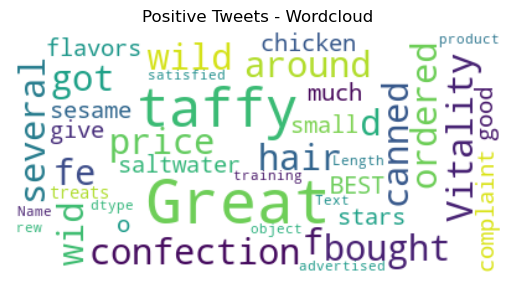

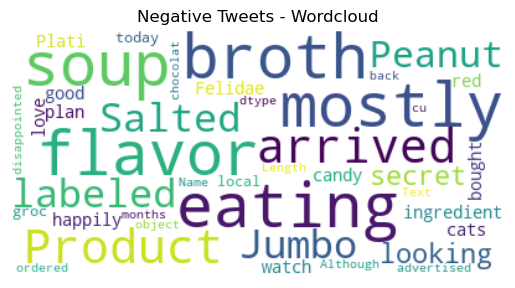

In [8]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
 
# Wordcloud with positive tweets
positive_tweets = data['Text'][data["Score"] > 3]
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
positive_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(str(positive_tweets))
plt.figure()
plt.title("Positive Tweets - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
 
# Wordcloud with negative tweets
negative_tweets = data['Text'][data["Score"] <= 3]
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
negative_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(str(negative_tweets))
plt.figure()
plt.title("Negative Tweets - Wordcloud")
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

![45SentimentAnalysis_10_0](https://github.com/FlyingWhalesHQ/flying-whales-blog/assets/7457301/5b4ade81-1b35-4914-bff7-2637a9078378)
![45SentimentAnalysis_10_1](https://github.com/FlyingWhalesHQ/flying-whales-blog/assets/7457301/83d514bf-3212-40b5-8d74-2f1b85d35ede)

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# First, we'll split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Text'], data['Score'], test_size=0.2, random_state=42)

# Then, we'll create a bag of words representation of our text data
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Now, we can train our Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_vec, y_train)

# And test its performance on unseen data
y_pred = clf.predict(X_test_vec)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.55      0.65      0.60     10326
           2       0.42      0.25      0.31      5855
           3       0.41      0.32      0.36      8485
           4       0.39      0.38      0.39     16123
           5       0.83      0.86      0.85     72902

    accuracy                           0.70    113691
   macro avg       0.52      0.49      0.50    113691
weighted avg       0.69      0.70      0.70    113691



array([[<AxesSubplot:title={'center':'Score'}>]], dtype=object)

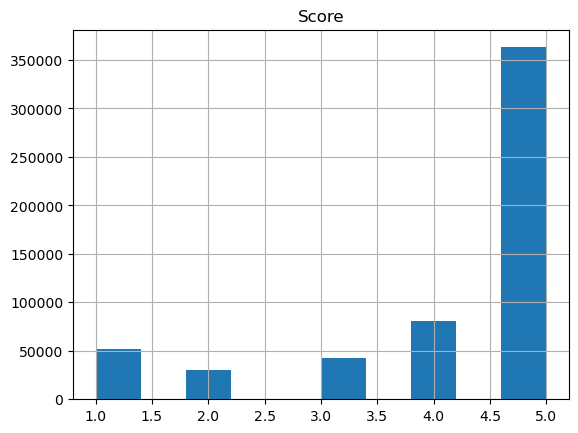

In [29]:
data.hist(column='Score')

![45SentimentAnalysis_7_1](https://github.com/FlyingWhalesHQ/flying-whales-blog/assets/7457301/ec7f2a6d-457b-4174-88ad-44e0db0bc994)


Text(0.5, 1.0, 'precision and f1-score')

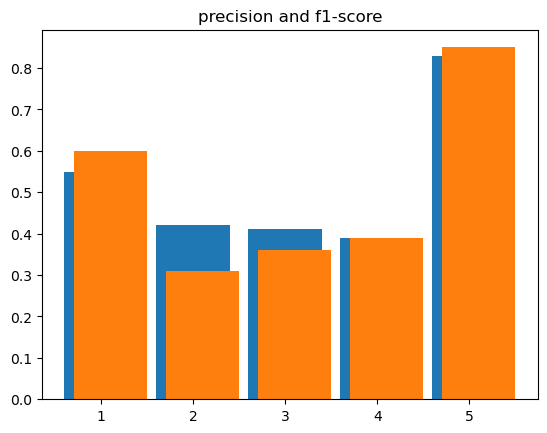

In [7]:
import matplotlib.pyplot as plt
plt.bar([1,2,3,4,5],[0.55,0.42,0.41,0.39,0.83])
plt.bar([1.1,2.1,3.1,4.1,5.1],[0.6,0.31,0.36,0.39,0.85])
plt.title('precision and f1-score')

![45SentimentAnalysis_8_1](https://github.com/FlyingWhalesHQ/flying-whales-blog/assets/7457301/740186ef-7bd5-474c-8588-12836968c81d)

In [34]:
# Let's have a look at some of the text and its prediction
X_test

165256    Having tried a couple of other brands of glute...
231465    My cat loves these treats. If ever I can't fin...
427827    A little less than I expected.  It tends to ha...
433954    First there was Frosted Mini-Wheats, in origin...
70260     and I want to congratulate the graphic artist ...
                                ...                        
205323    I have two rescue chihuahua mix dogs (2yr old ...
95366     Had this cereal while visiting family at Chris...
75510     Was getting this every 60 days. Cancelled beca...
381923    I felt that I had to give an update reassuring...
32333     The treats are my dogs' all-time hands-on favo...
Name: Text, Length: 113691, dtype: object

In [35]:
y_pred

array([5, 5, 3, ..., 3, 1, 5])

# Sentiment analysis challenges

This field is one of the hardest in NLP since even human experts struggle to provide a consistent and accurate analysis of emotions and words. First, sarcasm and irony are hard to detect to human somtimes. And we possess an incredible capability to generate and process words and sentences. For example, "Oh, great!" has the word "great" but if it comes with something like "Oh, great! Just what I needed!", an automated tool might not be able to recognize the subtle frustration and annoyance in the tone of the sentence. In a similar vein, defining neutral can be difficult. Neutral can be objective text, words with irrelevant information or something just to say. For example, "I wish the product had more integrations" is in general neutral, but "I wish the product were better" is negative. Second, handling negation is also tricky. In the example using textblob above, "I dislike old cabin cruisers." is classified as positive with subjectivity of 0.2, which is not very accurate, despite being a simple sentence. It should be negative with higher subjectivity score. Third, context can be a difficult to grasp for human sometimes. There are words that mean the opposite in different context. For example, an unpredictable weather is bad, but an unpredictable movie is considered interesting. New development in deep learning such as BERT, GPT have enabled machine to discern emotions and context much better. Forth, for new words coined by the internet, the models can be hard to catch up. Nowsaday people use emojis heavily to express their emotions, also slang and teen code. Overlooking those elements can reduce the accuracy of the model to a large extent. Fifth, the same words for sentiment description in one domain can be different for another domain. So the models are domain (data) specific. The sixth challenge comes from the diversity of languages all over the world. Each language comes with its set of rules and cultural challenges that sometimes unable to be satisfactorily translated into English. Hence the English centric models might not work so well. Last but not least, labeling sentiment on large scale requires human effort and involvement.